In [4]:
# Importing Packages
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
from qiskit.visualization import plot_histogram

In [5]:
# Input Secret Number
s = input("Input the secret number:\n")

Input the secret number:
10


01


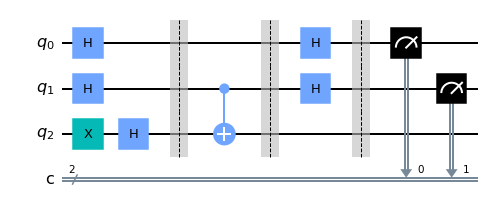

In [10]:
n=len(s)
qc = QuantumCircuit(n+1, n)
# Putting states in superposition
qc.x(n)
for i in range(n+1):
    qc.h(i)
qc.barrier()
# Apply the inner-product oracle
s=s[::-1] # reverse s to fit qiskit's qubit ordering
print(s)
for k in range(n):
    if s[k] == '1':
        qc.cx(k, n)
qc.barrier()
# Measuring
for m in range(n):
    qc.h(m)
qc.barrier()
for b in range(n):
    qc.measure(b,b)

qc.draw(output="mpl")

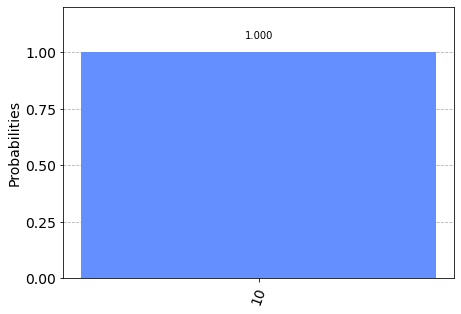

In [11]:
# Simulating on local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(qc)
results = aer_sim.run(qobj).result()
count = results.get_counts()
plot_histogram(count)

# References
[Bernstein-Vazirani Algorithm with Qiskit by Q-munity](https://www.qmunity.tech/tutorials/bernstein-vazirani-algorithm)

[Qiskit tutorial](https://qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html)